## IMPORTING LIBRARIES

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## READING THE DATASET

In [50]:
df = pd.read_csv('C:/Users/Admin/Desktop/TYITB72/dataset/carsdataset.csv')
df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


## DESCRIBING THE DATA

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [52]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## FINDING NULL VALLUES

In [53]:
df.isna()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [54]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

## SLICING

In [55]:

# seperating DEPENDENT AND INDEPENDENT VARIABLES
X = df.iloc[:,[0,1,3,4,5,6,7]]  #independent
Y = df.iloc[:, 2]                                              #dependent

In [56]:
X

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner


In [57]:
Y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

## ENCODING (DEALING WITH CATEGORICAL VALUES)

##### Now it gets complicated for machines to understand texts and process them, rather than numbers, since the models are based on mathematical equations and calculations. Therefore, we have to encode the categorical data.

#### 1) LABEL ENCODING

In [58]:
LEncoder = LabelEncoder()
X.iloc[:,4] = LEncoder.fit_transform(X.iloc[:,4])
X.iloc[:,5] = LEncoder.fit_transform(X.iloc[:,5])
X.iloc[:,6] = LEncoder.fit_transform(X.iloc[:,6])
X.iloc[:,3] = LEncoder.fit_transform(X.iloc[:,3])

In [59]:
X

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,100000,1,1,1,0
3,Datsun RediGO T Option,2017,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,141000,1,1,1,2
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,1,1,1,2
4337,Maruti 800 AC BSIII,2009,83000,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,1,1,1,0


## SCALING

In [60]:
sc_x = StandardScaler()

In [61]:
X['km_driven'] = sc_x.fit_transform(X['km_driven'].values.reshape(-1,1))

C:\Users\Admin\AppData\Local\Temp\ipykernel_4456\660138991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['km_driven'] = sc_x.fit_transform(X['km_driven'].values.reshape(-1,1))


In [62]:
X['year'] = sc_x.fit_transform(X['year'].values.reshape(-1,1))

C:\Users\Admin\AppData\Local\Temp\ipykernel_4456\2639998384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['year'] = sc_x.fit_transform(X['year'].values.reshape(-1,1))


In [63]:
X

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,-1.445074,0.081139,4,1,1,0
1,Maruti Wagon R LXI Minor,-1.445074,-0.347689,4,1,1,0
2,Hyundai Verna 1.6 SX,-0.258795,0.724381,1,1,1,0
3,Datsun RediGO T Option,0.927485,-0.433455,4,1,1,0
4,Honda Amaze VX i-DTEC,0.215717,1.603479,1,1,1,2
...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),0.215717,0.295553,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,0.215717,0.295553,1,1,1,2
4337,Maruti 800 AC BSIII,-0.970563,0.359877,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,0.690229,0.509967,1,1,1,0


## SPLITING DATASET INTO TRAINING AND TESTING DATA

In [64]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)

In [65]:
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner
66,Toyota Etios GD,0.215717,0.552850,1,0,1,0
188,Volkswagen Vento Celeste 1.5 TDI Highline AT,0.690229,0.081139,1,1,0,0
219,Hyundai EON Era Plus,-0.258795,-0.261923,4,0,1,0
2034,Tata Safari Storme EX,1.401997,-0.905166,1,1,1,0
835,Hyundai Creta 1.4 CRDi Base,0.690229,0.295553,1,1,1,0
...,...,...,...,...,...,...,...
1033,Audi A6 2.0 TDI Premium Plus,-0.021539,-0.165437,1,0,0,0
3264,Chevrolet Beat Diesel LS,-0.258795,0.938795,1,1,1,0
1653,Datsun RediGO S,0.690229,-0.948049,4,1,1,0
2607,Volkswagen Polo 1.5 TDI Highline,0.452973,0.081139,1,1,1,0


In [66]:
Y_train

66       525000
188      650000
219      235000
2034    1250000
835      900000
         ...   
1033    1300000
3264     120000
1653     270000
2607     600000
2732     229999
Name: selling_price, Length: 3255, dtype: int64

In [67]:
X_test

,name,year,km_driven,fuel,seller_type,transmission,owner
2089,Hyundai Verna SX CRDi AT,-0.258795,0.082640,1,0,0,0
1077,Audi A4 3.0 TDI Quattro,-0.021539,0.424202,1,0,0,0
1495,Maruti Omni MPI STD BSIV,0.215717,1.153209,4,1,1,4
555,BMW X5 xDrive 30d xLine,1.401997,-0.776517,1,0,0,0
2615,Fiat Grande Punto Active (Diesel),-0.970563,0.617174,1,1,1,2
...,...,...,...,...,...,...,...
249,Hyundai Grand i10 1.2 Kappa Asta,1.164741,-0.733634,4,1,1,0
3540,Maruti Swift VDI BSIV,0.452973,-0.133275,1,1,1,4
3247,Ford Figo Petrol EXI,0.215717,0.509967,4,1,1,2
535,Hyundai EON Era Plus,0.452973,-0.969490,4,0,1,2


In [68]:
Y_test

2089     465000
1077    1580000
1495     150000
555     4950000
2615     125000
         ...   
249      500000
3540     465000
3247     350000
535      295000
509      600000
Name: selling_price, Length: 1085, dtype: int64

## CLEAN DF:

In [73]:
X_train.to_csv('C:/Users/Admin/Desktop/TYITB72/dataset./X_train.csv')
Y_train.to_csv('C:/Users/Admin/Desktop/TYITB72/dataset./Y_train.csv')
X_test.to_csv('C:/Users/Admin/Desktop/TYITB72/dataset./X_test.csv')
Y_test.to_csv('C:/Users/Admin/Desktop/TYITB72/dataset./Y_test.csv')

## VISUALIZATION

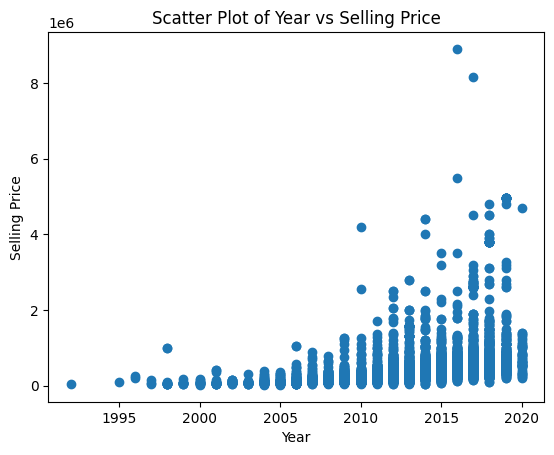

In [70]:
plt.scatter(df['year'], df['selling_price'])
plt.title('Scatter Plot of Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

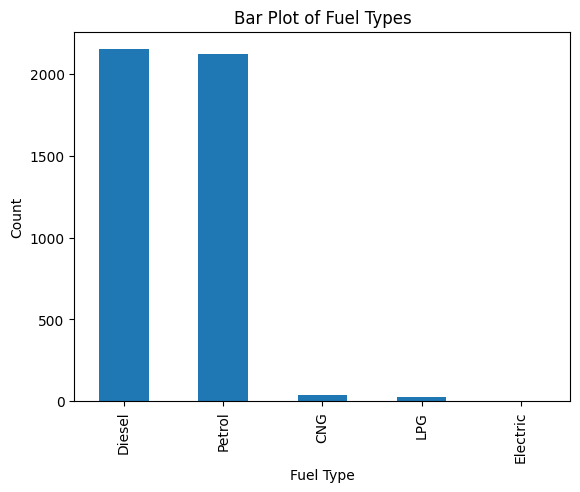

In [71]:
fuel_counts = df['fuel'].value_counts()
fuel_counts.plot(kind='bar')
plt.title('Bar Plot of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

## CHECKING RELATIONSHIPS

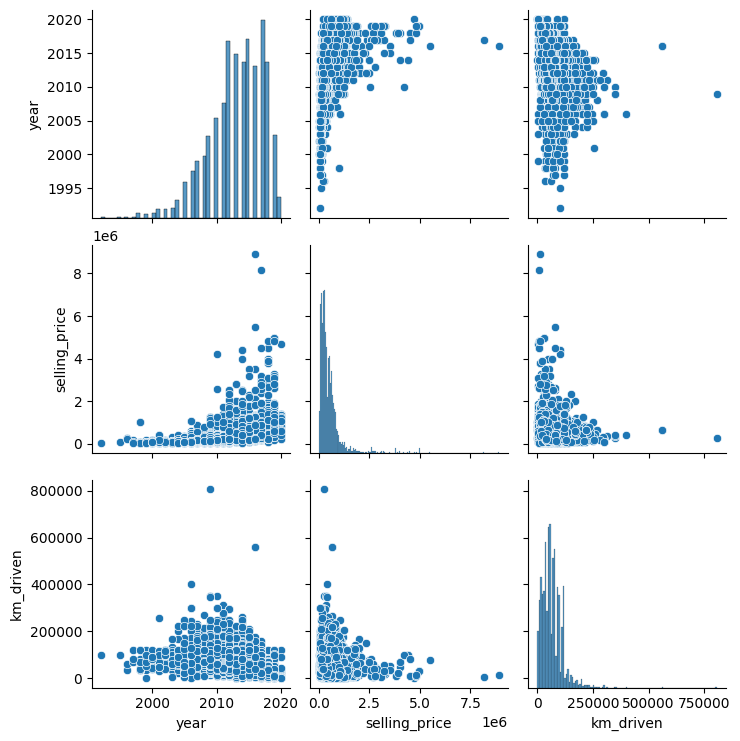

In [72]:
sns.pairplot(df)